In [19]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [21]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [22]:
dataset = pd.read_csv('churn.csv')

In [23]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
  # divide the dataset to features and target 
  X= dataset.iloc[:,3:-1] 
  Y = dataset.iloc[:,-1]

In [25]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
geography = pd.get_dummies(X['Geography'])

In [28]:
gender = pd.get_dummies(X['Gender'])

In [29]:
# concatenate the above variables with the dataset
X = X.drop(['Geography','Gender'],axis = 1)

In [30]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [31]:
X = pd.concat([X,geography,gender],axis =1)

In [32]:
# splitting the data for test and train
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train , Y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [33]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [35]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [36]:
X_train.shape

(8000, 13)

In [37]:
# creating the ANN

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU ,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [39]:
classifier = Sequential()

In [40]:
# adding the input layer 
classifier .add(Dense(units = 11,activation = 'relu'))

In [41]:
# adding the first hidden layer 
classifier.add(Dense(units = 7,activation = 'relu'))

In [42]:
# adding the second hidden layer
classifier.add(Dense(units = 6,activation = 'relu'))

In [43]:
# add the output layer
classifier.add(Dense(1,activation = 'sigmoid'))

In [44]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [45]:
# adding the learning rate 
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [48]:
#early stopping 
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [49]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33 ,batch_size=10 , epochs = 1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3169 - accuracy: 0.8664 - val_loss: 0.3770 - val_accuracy: 0.8501
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3177 - accuracy: 0.8675 - val_loss: 0.3719 - val_accuracy: 0.8527
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3174 - accuracy: 0.8683 - val_loss: 0.3737 - val_accuracy: 0.8497
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3172 - accuracy: 0.8664 - val_loss: 0.3796 - val_accuracy: 0.8516
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3190 - accuracy: 0.8658 - val_loss: 0.3711 - val_accuracy: 0.8546
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3162 - accuracy: 0.8670 - val_loss: 0.3862 - val_accuracy: 0.8478
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3172 - accuracy: 0.8655 - val_loss: 0.3806 - val_accuracy:

In [51]:
 model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

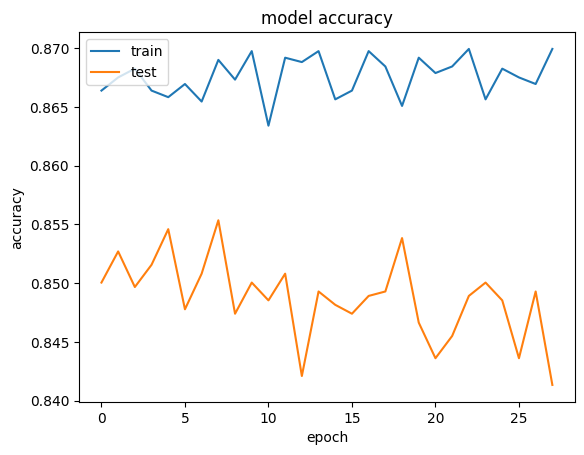

In [52]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

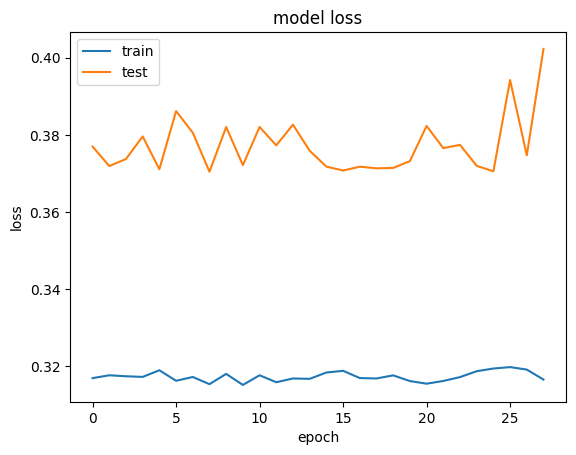

In [58]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [54]:
#predection and evaluating the model 
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [55]:
# confusion matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1420,  175],
       [ 164,  241]])

In [57]:
# the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,Y_test)

In [59]:
score

0.8305

In [60]:
# showing the weights 
classifier.get_weights()

[array([[-2.9426894e-01, -9.7591567e-01,  2.8786913e-01, -5.3853375e-01,
         -2.5956485e-02,  2.5175357e+00,  1.2945751e+00,  1.0706739e+00,
          7.5113967e-02,  7.0915920e-01, -8.6288065e-01],
        [ 7.9823680e+00,  2.9846900e+00, -3.6995695e+00,  6.6109171e+00,
          3.8712869e+00, -2.7694645e+00,  2.6046641e+00, -3.8282771e+00,
          6.0128798e+00,  2.2492571e+00,  2.2528744e+00],
        [-9.9783921e-01, -1.3707213e+00,  2.5967691e+00,  4.2910978e-01,
         -1.1973883e+00, -9.6248440e-02,  2.2212651e+00,  3.7689922e+00,
          2.2860184e-01,  1.4828608e+00, -2.7025962e-01],
        [-1.4378989e+00,  2.8732452e+00,  6.2226038e+00, -9.0826750e-01,
          1.3212208e+00, -6.0962968e+00,  2.1783264e-01, -3.7292840e+00,
         -3.4735065e+00,  1.8457741e+00, -6.4868145e+00],
        [-2.6498821e+00,  2.5891068e+00,  1.0881752e+00,  7.6712036e+00,
          1.0741120e+01, -4.0554423e+00,  1.0798875e+01, -2.6984055e+00,
         -2.2878869e+00, -6.6933036e+0